In [1]:
import csv
import os
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix, accuracy_score

label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
signs = sorted(os.listdir("./Keypoint_Data/"))
sign_id = {label: num for num, label in enumerate(signs)}
signs

['hello',
 'hi',
 'how are you',
 'i love you',
 'maybe',
 'sorry',
 'take care',
 'thank you',
 'wait',
 'youre welcome']

In [2]:
y_true = []
y_pred = []
for sign in signs:
    for x in glob.glob(f'DATA COLLECTION/{sign}/Samples/*.csv'):
        x = x.replace('\\', '/')
        if x == f'DATA COLLECTION/{sign}/Samples/averages.csv':
            continue
        with open(x) as csvfile:
            csv_reader = csv.reader(csvfile)
            
            for line in csv_reader:
                y_pred.append(sign_id[line[0]])
                y_true.append(sign_id[sign])
        

In [3]:
df = pd.DataFrame()
df['y_true'] = y_true
df['y_pred'] = y_pred



In [6]:
accuracy_score(df['y_true'], df['y_pred'])

0.8706281833616298

In [7]:

cm = confusion_matrix(y_true, y_pred, labels=label)

In [10]:
df_cm = pd.DataFrame(cm)
df_cm = df_cm.set_index(pd.Series([signs[i] for i in range(10)]))
df_cm = df_cm.rename(columns = {i: signs[i] for i in range(10)})
df_cm

,hello,hi,how are you,i love you,maybe,sorry,take care,thank you,wait,youre welcome
hello,11912,0,0,31,0,0,0,0,0,1
hi,2,6847,0,8,0,112,0,0,202,0
how are you,62,0,6815,797,13,0,181,25,5,1375
i love you,0,3,0,11173,0,0,0,0,0,0
maybe,0,108,89,759,12203,0,423,360,331,0
sorry,3,1453,0,41,17,18919,0,1,2268,1
take care,24,12,1017,2567,210,0,11663,267,59,30
thank you,83,9,57,3417,249,1,0,17725,15,0
wait,0,336,0,43,2,92,0,0,15137,20
youre welcome,499,0,29,579,0,0,0,0,0,10678


C:\Users\Baron\AppData\Local\Temp\ipykernel_3092\3216493045.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar.set_ticklabels(percent)


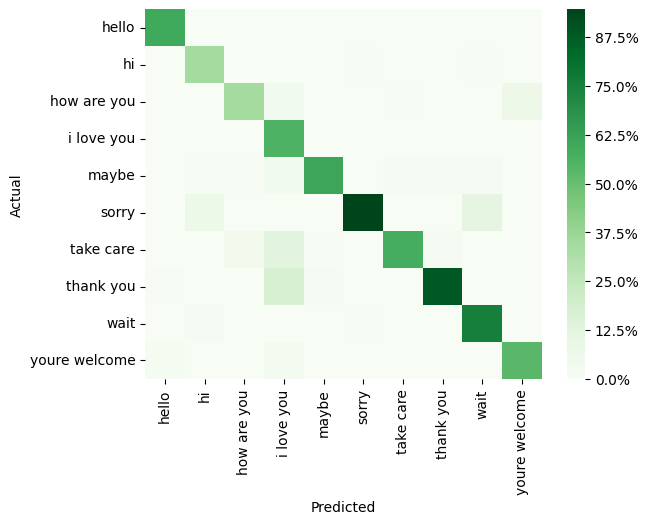

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

ax = sns.heatmap(df_cm, cmap='Greens')

colorbar = ax.collections[0].colorbar

# Retrieve the values of the color bar
colorbar_values = colorbar.get_ticks().tolist()
max_val = max(colorbar_values)
percent = [f'{(x/max_val) * 100}%'for x in colorbar_values]

colorbar.set_ticklabels(percent)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


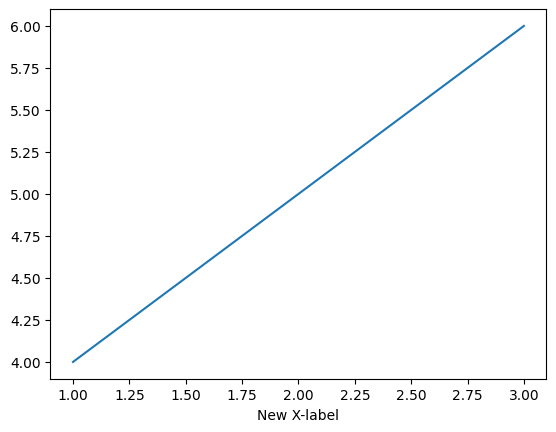

In [89]:
import matplotlib.pyplot as plt

# Plot some data
plt.plot([1, 2, 3], [4, 5, 6])

# Set x-label
plt.xlabel('New X-label')

# Display the plot
plt.show()


hello


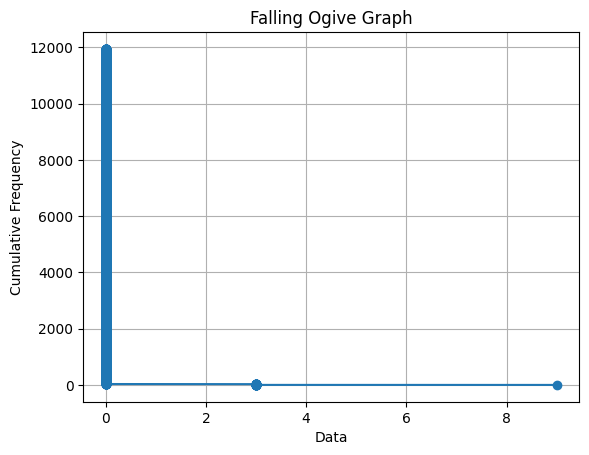


hi


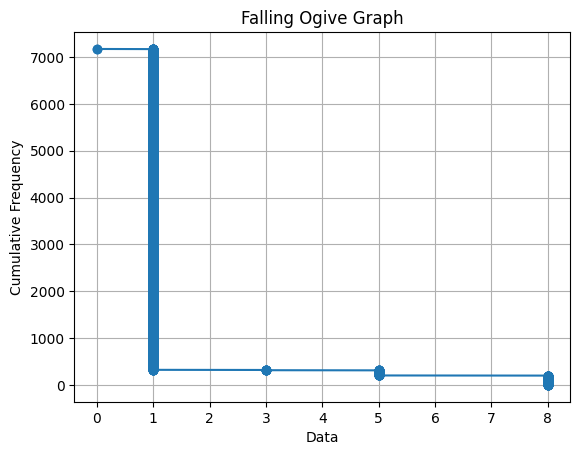


how are you


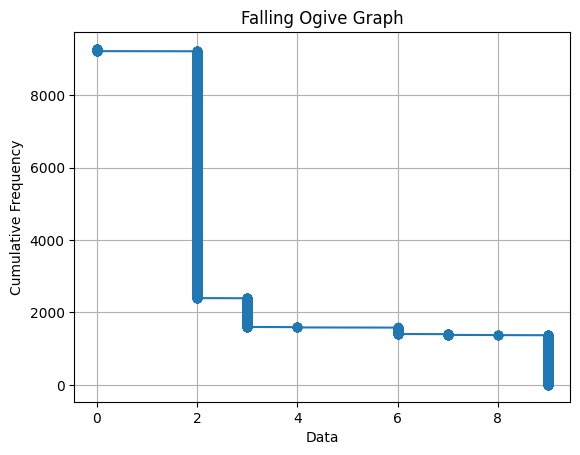


i love you


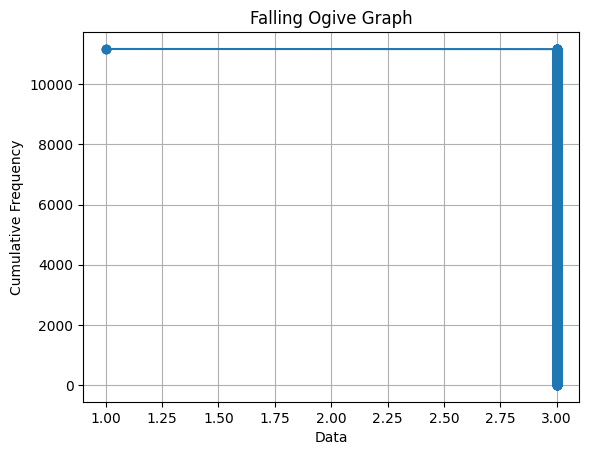


maybe


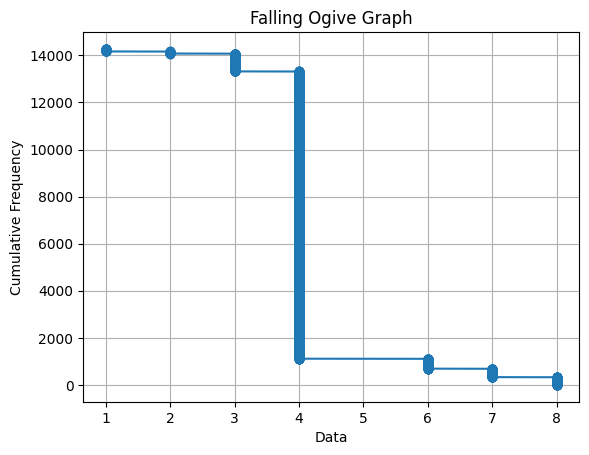


sorry


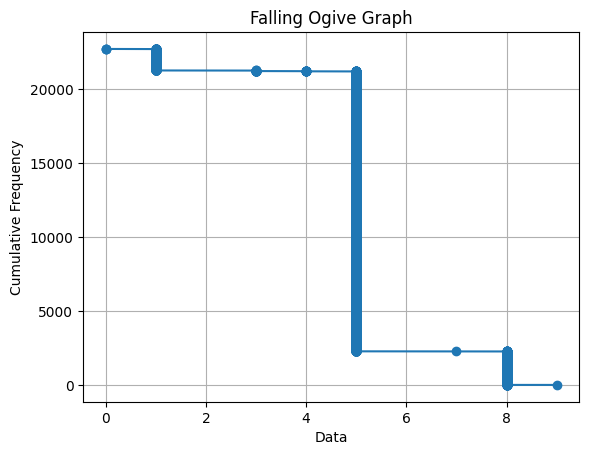


take care


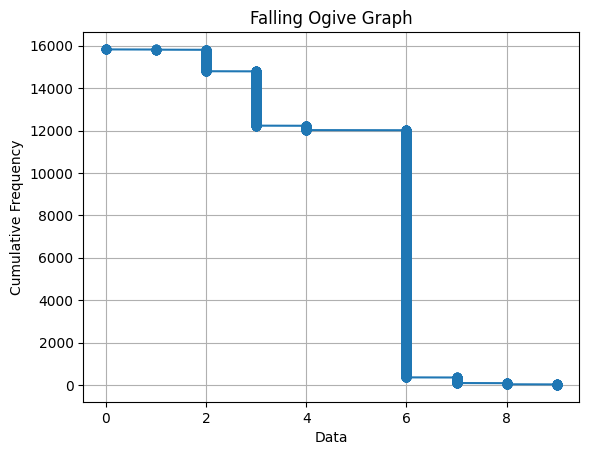


thank you


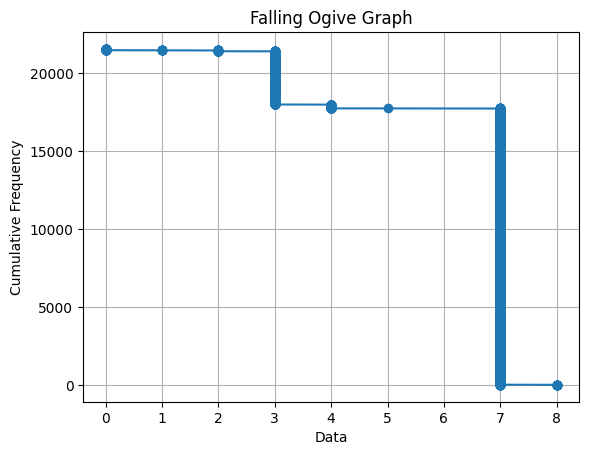


wait


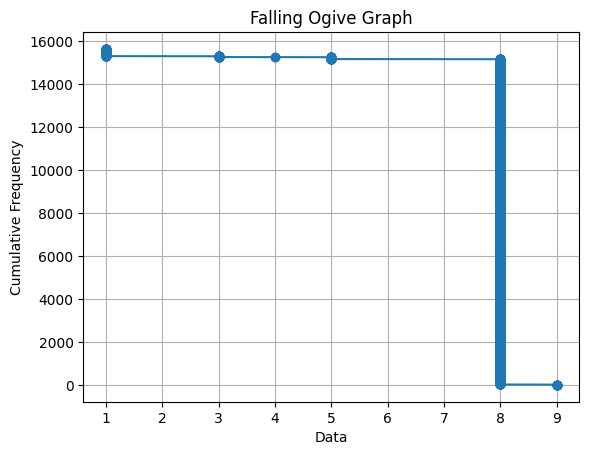


youre welcome


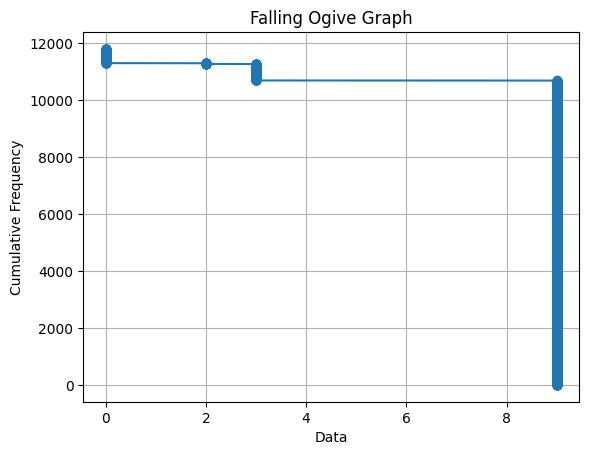

<Figure size 640x480 with 0 Axes>

In [88]:
import glob
import numpy as np
import matplotlib.pyplot as plt 

for sign in signs:
    li = []
    for x in glob.glob(f'DATA COLLECTION/{sign}/samples/*.csv'):
        x = x.replace('\\', '/')
        if x == f'DATA COLLECTION/{sign}/samples/averages.csv':
            continue
        
        with open(x) as csvfile:
            csv_reader = csv.reader(csvfile)
            
            for line in csv_reader:
                li.append(sign_id[line[0]])
                
    print(sign)

    sorted_array = np.sort(li)

# Calculate cumulative frequencies in decreasing order
    cumulative_freq = np.arange(len(li), 0, -1)

# Plotting the falling ogive graph
    plt.plot(sorted_array, cumulative_freq, '-o')

# Customizing the graph
    plt.xlabel('Data')
    plt.ylabel('Cumulative Frequency')
    plt.title('Falling Ogive Graph')
    plt.grid(True)

# Display the graph
    plt.show()
    plt.clf()
    print()


In [16]:
sign_id

{'hello': 0,
 'hi': 1,
 'how are you': 2,
 'i love you': 3,
 'maybe': 4,
 'sorry': 5,
 'take care': 6,
 'thank you': 7,
 'wait': 8,
 'youre welcome': 9}

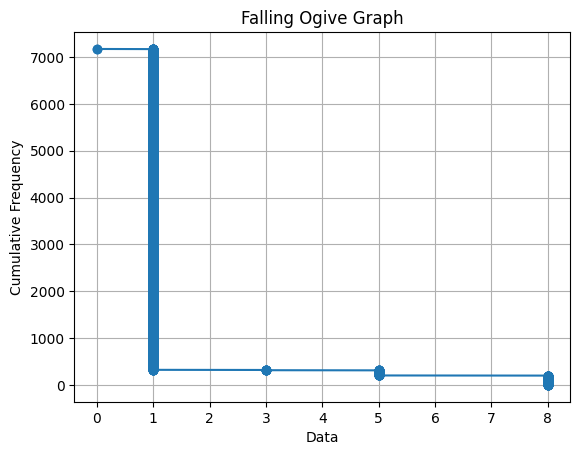

In [86]:
import numpy as np
import matplotlib.pyplot as plt

array = data['hi']

sorted_array = np.sort(array)

# Calculate cumulative frequencies in decreasing order
cumulative_freq = np.arange(len(sorted_array), 0, -1)

# Plotting the falling ogive graph
plt.plot(sorted_array, cumulative_freq, '-o')

# Customizing the graph
plt.xlabel('Data')
plt.ylabel('Cumulative Frequency')
plt.title('Falling Ogive Graph')
plt.grid(True)

# Display the graph
plt.show()